# DS-SF-27 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [5]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [6]:
# TODO 
df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


Answer: 400

> ### Question 2.  Create a summary table.

In [7]:
# TODO
df.describe()

/Users/niloo_ga/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [ ]:
# TODO

Answer: Larger range/spread of scores.

> ### Question 4.  Drop data points with missing data.

In [8]:
# TODO
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [9]:
df.dropna(axis = 'index', subset = ['gre', 'gpa', 'prestige'], inplace=True)

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [10]:
# TODO
df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


Answer: The number of rows decreased.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

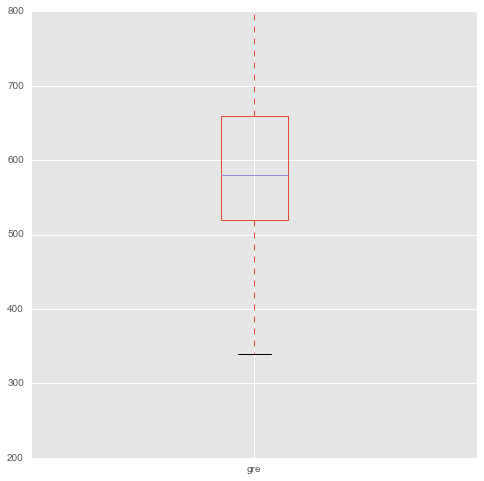

In [11]:
# TODO
df[ ['gre'] ].plot(kind = 'box', figsize = (8, 8))

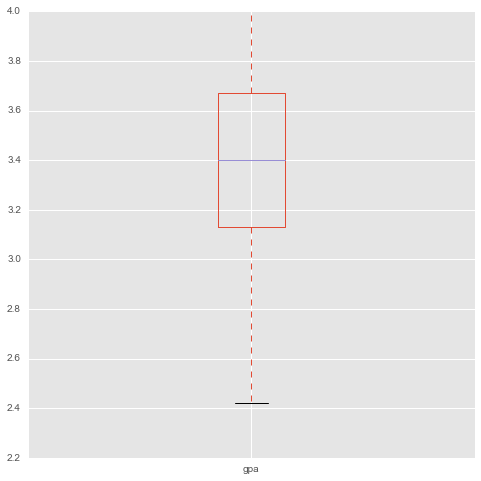

In [12]:
# TODO
df[ ['gpa'] ].plot(kind = 'box', figsize = (8, 8))

> ### Question 7.  What do boxplots show?

Answer: Boxplots graphically show how the data is distributed. By creating a boxplot, it is easy to see the range, skewness and potential outliers of the data.

> ### Question 8.  Plot the distribution of each variable.

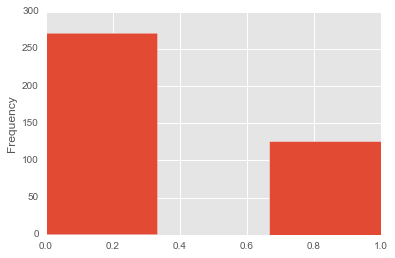

In [13]:
# TODO
#df.plot(kind='scatter', x='admit', y='gre')
df.admit.plot(kind='hist', bins=3)

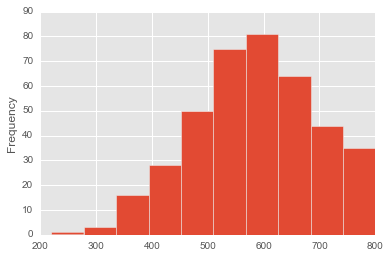

In [14]:
# TODO
df.gre.plot(kind='hist', bins=10)

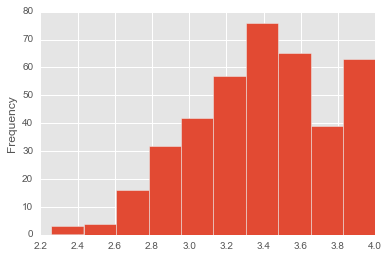

In [15]:
# TODO
df.gpa.plot(kind='hist', bins=10)

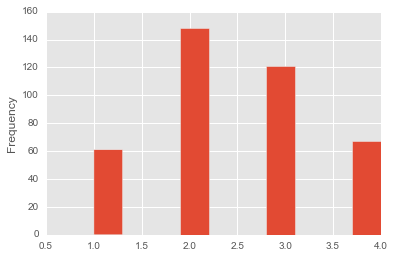

In [16]:
# TODO
df.prestige.plot(kind='hist', bins=10)

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

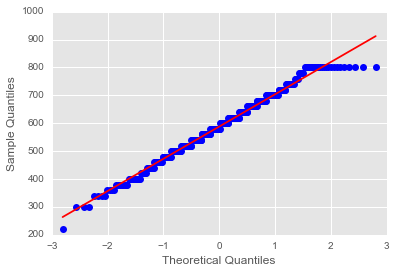

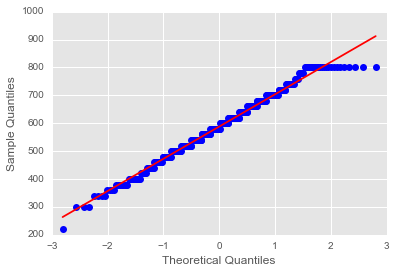

In [17]:
# TODO
sm.qqplot(df.gre, line = 's')

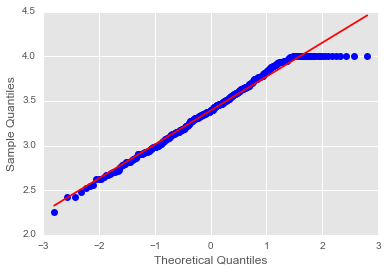

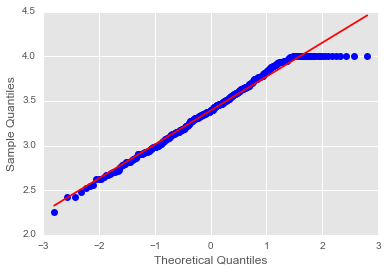

In [18]:
# TODO
sm.qqplot(df.gpa, line = 's')

In [25]:
model = smf.ols(formula = 'gre ~ gpa', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gre   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     67.66
Date:                Mon, 03 Oct 2016   Prob (F-statistic):           2.84e-15
Time:                        17:56:46   Log-Likelihood:                -2417.6
No. Observations:                 397   AIC:                             4839.
Df Residuals:                     395   BIC:                             4847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    193.0449     48.299      3.997      0.000        98.089   288.001
gpa          116.3873     14.150      8.225      0.000        88.569   144.206
==============================================================================
Omnibus:                        1.159   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                1.172
Skew:                          -0.045   Prob(JB):                        0.557
Kurtosis:                       2.749   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer: Passes the tests. T-value is greater than 2. Assumption of linear model is appropriate.

> ### Question 10.  Create a correlation matrix for the dataset

In [19]:
# TODO
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [24]:
X = df[ ['gpa'] ] # X, the feature matrix, is a DataFrame
y = df.gre # y, the response vector, is a Series

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gre   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.158e+04
Date:                Mon, 03 Oct 2016   Prob (F-statistic):          2.63e-295
Time:                        17:56:33   Log-Likelihood:                -2425.5
No. Observations:                 397   AIC:                             4853.
Df Residuals:                     396   BIC:                             4857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gpa          172.5908      1.604    107.628      0.000       169.438   175.743
==============================================================================
Omnibus:                        0.340   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.464
Skew:                           0.029   Prob(JB):                        0.793
Kurtosis:                       2.843   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

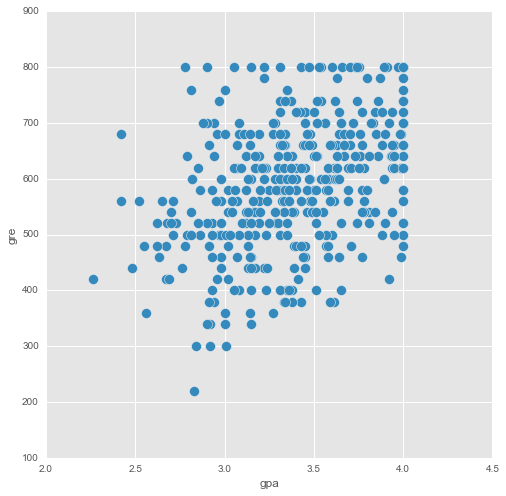

In [26]:
df.plot(kind = 'scatter', x = 'gpa', y = 'gre', s = 100, figsize = (8, 8))

> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: There are not a lot of very strong correlations, however gpa and gre score are potentially colinear.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: Analyze the distribution of high school prestige of admitted students and compare that to the distribution of hig school prestige on non-admitted students. 

> ### Question 13.  What is your hypothesis?

Answer: I think that there will be more admitted students who went to high schools with higher prestige ratings than admitted students who went to high schools with lower prestige ratings.